In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [11]:
data = pd.read_csv('zomato.csv', encoding = 'latin1')
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


## Observation:

- When a column in a column has a possibility of containing currency symbols or text from some other language apart from English. The read_csv() cannot process that. Including the encoding parameter will help the read_csv() to process that and load the data successfully

In [12]:
## data exploration

data.shape

(9551, 21)

In [13]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

# Dropping the unnecessary column

In [17]:
cols_to_del = ['Country Code', "Address", "Locality Verbose", 'Longitude', 'Latitude', 
               'Switch to order menu', 'Rating color']

cols_to_del

['Country Code',
 'Address',
 'Locality Verbose',
 'Longitude',
 'Latitude',
 'Switch to order menu',
 'Rating color']

In [19]:
data = data.drop(cols_to_del, axis = 1)
data.head()

,Restaurant ID,Restaurant Name,City,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes
0,6317637,Le Petit Souffle,Makati City,"Century City Mall, Poblacion, Makati City","French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,3,4.8,Excellent,314
1,6304287,Izakaya Kikufuji,Makati City,"Little Tokyo, Legaspi Village, Makati City",Japanese,1200,Botswana Pula(P),Yes,No,No,3,4.5,Excellent,591
2,6300002,Heat - Edsa Shangri-La,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City","Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,4,4.4,Very Good,270
3,6318506,Ooma,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Sushi",1500,Botswana Pula(P),No,No,No,4,4.9,Excellent,365
4,6314302,Sambo Kojin,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,4,4.8,Excellent,229


## Check whether duplicated data exists

In [22]:
data.duplicated().sum()

0

# Univariate Cagtegorical Analysis
# Categorical Column plots

In [24]:
name = ['A', 'B', 'D', 'A', 'B', 'A', 'D', 'B', 'A', 'B', 'A', 'C', 'C','C','D', 'A', 'D']
print(name)

['A', 'B', 'D', 'A', 'B', 'A', 'D', 'B', 'A', 'B', 'A', 'C', 'C', 'C', 'D', 'A', 'D']


In [29]:
ser = pd.Series(name)
ser.value_counts()

A    6
B    4
D    4
C    3
dtype: int64

<Axes: ylabel='count'>

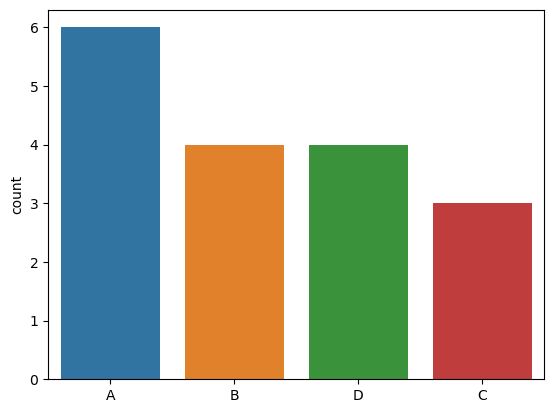

In [28]:
sns.countplot(x = name)

## Bivariate Categorical Analysis

In [30]:
company = ['Apple', 'Google', 'Reliance Industries', 'Tesla', 'Microsoft']
profit = [89, 85, 76, 92, 68]

# Which company is performing the highest profits?

<Axes: >

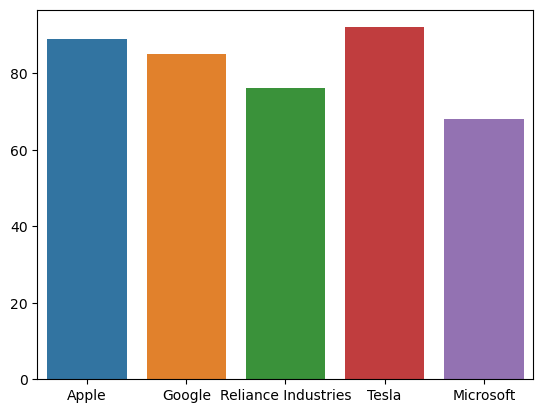

In [31]:
## Comparison involved

sns.barplot(x = company, y = profit)

# How many restuarants are Excellent rated?

<Axes: xlabel='Rating text', ylabel='count'>

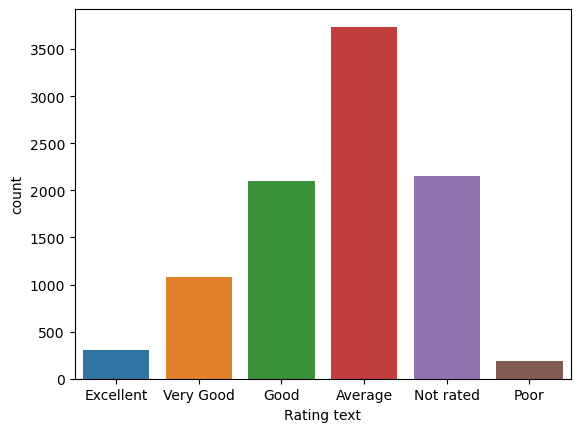

In [32]:
sns.countplot(x = data['Rating text'])

In [33]:
data.head()

,Restaurant ID,Restaurant Name,City,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes
0,6317637,Le Petit Souffle,Makati City,"Century City Mall, Poblacion, Makati City","French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,3,4.8,Excellent,314
1,6304287,Izakaya Kikufuji,Makati City,"Little Tokyo, Legaspi Village, Makati City",Japanese,1200,Botswana Pula(P),Yes,No,No,3,4.5,Excellent,591
2,6300002,Heat - Edsa Shangri-La,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City","Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,4,4.4,Very Good,270
3,6318506,Ooma,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Sushi",1500,Botswana Pula(P),No,No,No,4,4.9,Excellent,365
4,6314302,Sambo Kojin,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,4,4.8,Excellent,229


In [35]:
data['City'].unique()

array(['Makati City', 'Mandaluyong City', 'Pasay City', 'Pasig City',
       'Quezon City', 'San Juan City', 'Santa Rosa', 'Tagaytay City',
       'Taguig City', 'Brasí_lia', 'Rio de Janeiro', 'Sí£o Paulo',
       'Albany', 'Armidale', 'Athens', 'Augusta', 'Balingup',
       'Beechworth', 'Boise', 'Cedar Rapids/Iowa City', 'Chatham-Kent',
       'Clatskanie', 'Cochrane', 'Columbus', 'Consort', 'Dalton',
       'Davenport', 'Des Moines', 'Dicky Beach', 'Dubuque',
       'East Ballina', 'Fernley', 'Flaxton', 'Forrest', 'Gainesville',
       'Hepburn Springs', 'Huskisson', 'Inverloch', 'Lakes Entrance',
       'Lakeview', 'Lincoln', 'Lorn', 'Macedon', 'Macon', 'Mayfield',
       'Mc Millan', 'Middleton Beach', 'Miller', 'Monroe', 'Montville',
       'Ojo Caliente', 'Orlando', 'Palm Cove', 'Paynesville', 'Penola',
       'Pensacola', 'Phillip Island', 'Pocatello', 'Potrero', 'Princeton',
       'Rest of Hawaii', 'Savannah', 'Singapore', 'Sioux City',
       'Tampa Bay', 'Tanunda', 'Trentha

In [37]:
data['City'].nunique()

141

In [38]:
data.head()

,Restaurant ID,Restaurant Name,City,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes
0,6317637,Le Petit Souffle,Makati City,"Century City Mall, Poblacion, Makati City","French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,3,4.8,Excellent,314
1,6304287,Izakaya Kikufuji,Makati City,"Little Tokyo, Legaspi Village, Makati City",Japanese,1200,Botswana Pula(P),Yes,No,No,3,4.5,Excellent,591
2,6300002,Heat - Edsa Shangri-La,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City","Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,4,4.4,Very Good,270
3,6318506,Ooma,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Sushi",1500,Botswana Pula(P),No,No,No,4,4.9,Excellent,365
4,6314302,Sambo Kojin,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,4,4.8,Excellent,229


<Axes: xlabel='Aggregate rating', ylabel='Count'>

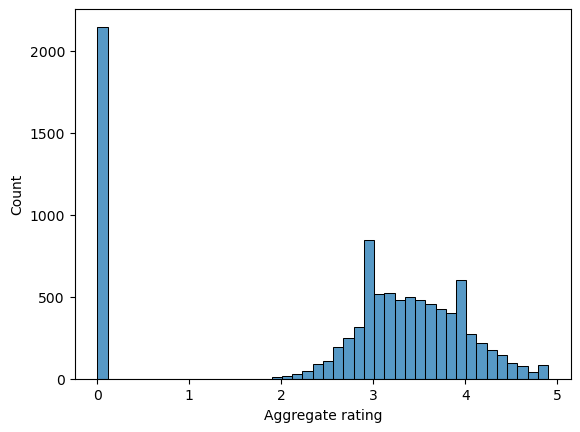

In [39]:
## Check the distribution of average rating

sns.histplot(x = data['Aggregate rating'])

# Which cities are having higher number of zero rated restaurants?

In [40]:
data.head()

,Restaurant ID,Restaurant Name,City,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes
0,6317637,Le Petit Souffle,Makati City,"Century City Mall, Poblacion, Makati City","French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,3,4.8,Excellent,314
1,6304287,Izakaya Kikufuji,Makati City,"Little Tokyo, Legaspi Village, Makati City",Japanese,1200,Botswana Pula(P),Yes,No,No,3,4.5,Excellent,591
2,6300002,Heat - Edsa Shangri-La,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City","Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,4,4.4,Very Good,270
3,6318506,Ooma,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Sushi",1500,Botswana Pula(P),No,No,No,4,4.9,Excellent,365
4,6314302,Sambo Kojin,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,4,4.8,Excellent,229


# Cuisines Analysis

In [43]:
cuisine_counts = data['Cuisines'].str.split(", ").explode().value_counts()
top_cuisines = cuisine_counts.head(10)
top_cuisines

North Indian    3960
Chinese         2735
Fast Food       1986
Mughlai          995
Italian          764
Bakery           745
Continental      736
Cafe             703
Desserts         653
South Indian     636
Name: Cuisines, dtype: int64

Text(0.5, 1.0, 'Top 10 cuisines')

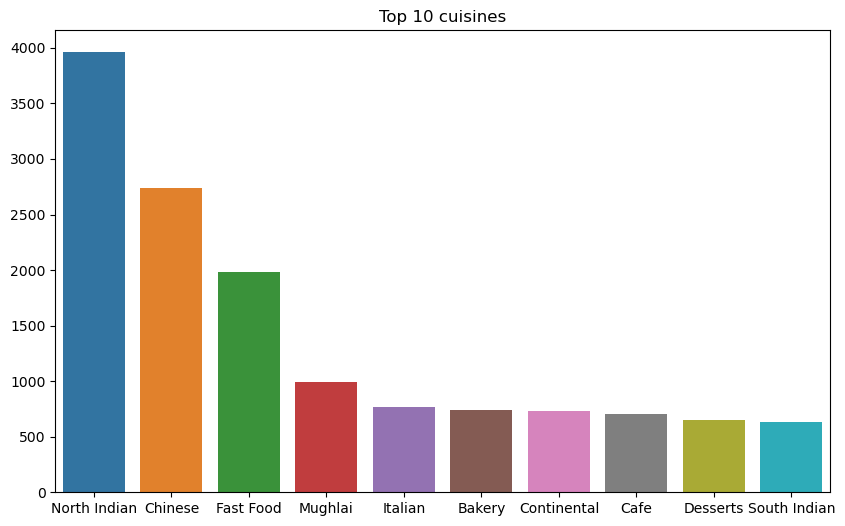

In [44]:
plt.figure(figsize = (10, 6))
sns.barplot(x = top_cuisines.index, y = top_cuisines.values)
plt.title("Top 10 cuisines")

<Axes: xlabel='Average Cost for two', ylabel='Aggregate rating'>

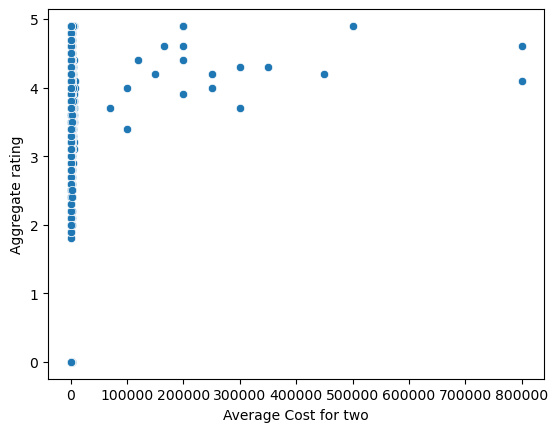

In [51]:
sns.scatterplot(x = data["Average Cost for two"], y = data["Aggregate rating"])
# plt.xticks()

# Location Analysis

In [61]:
top_10_cities = data['City'].value_counts().head(10)
top_10_cities

New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Amritsar          21
Ahmedabad         21
Lucknow           21
Guwahati          21
Name: City, dtype: int64

Text(0.5, 1.0, 'Number of Restaurants by City')

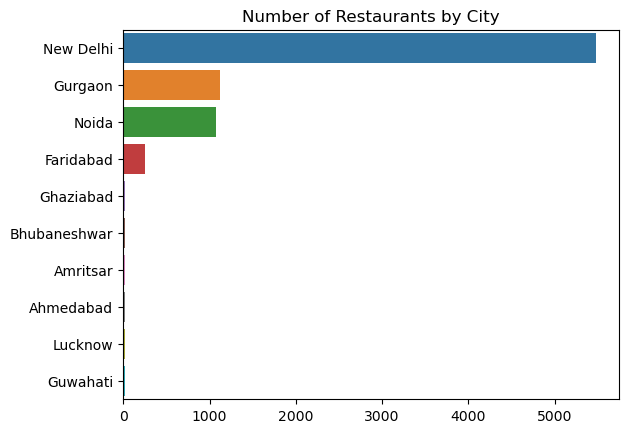

In [65]:
top_10_cities = data['City'].value_counts().head(10)
sns.barplot(y = top_10_cities.index, x = top_10_cities.values)
plt.title("Number of Restaurants by City")

# What was the most common rating?

In [66]:
data.head()

,Restaurant ID,Restaurant Name,City,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes
0,6317637,Le Petit Souffle,Makati City,"Century City Mall, Poblacion, Makati City","French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,3,4.8,Excellent,314
1,6304287,Izakaya Kikufuji,Makati City,"Little Tokyo, Legaspi Village, Makati City",Japanese,1200,Botswana Pula(P),Yes,No,No,3,4.5,Excellent,591
2,6300002,Heat - Edsa Shangri-La,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City","Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,4,4.4,Very Good,270
3,6318506,Ooma,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Sushi",1500,Botswana Pula(P),No,No,No,4,4.9,Excellent,365
4,6314302,Sambo Kojin,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,4,4.8,Excellent,229


In [67]:
data['Aggregate rating'].value_counts()

0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: Aggregate rating, dtype: int64

# Display the top 5 areas in Bangalore that have the maximum number of high and low rated restaurants

In [68]:
data.head()

,Restaurant ID,Restaurant Name,City,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes
0,6317637,Le Petit Souffle,Makati City,"Century City Mall, Poblacion, Makati City","French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,3,4.8,Excellent,314
1,6304287,Izakaya Kikufuji,Makati City,"Little Tokyo, Legaspi Village, Makati City",Japanese,1200,Botswana Pula(P),Yes,No,No,3,4.5,Excellent,591
2,6300002,Heat - Edsa Shangri-La,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City","Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,4,4.4,Very Good,270
3,6318506,Ooma,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Sushi",1500,Botswana Pula(P),No,No,No,4,4.9,Excellent,365
4,6314302,Sambo Kojin,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,4,4.8,Excellent,229


In [77]:
data[(data['Locality']=="Bangalore")  & (data['Aggregate rating']== data['Aggregate rating'].max())]

,Restaurant ID,Restaurant Name,City,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes


KeyError: 'Column not found: Bangalore'